# **Unisinos - Deep Learning**

##Integrantes

Elcio Mena Eich, Fernando Dalpiaz Boff, Jean Luckei Tolotti, Luciano Garim, Luis Dinarte Escobar Resende

#**SEÇÃO 1 - RESUMO DO TRABALHO** 

Neste trabalho exploramos a classificação de imagens através da utilização de dois algoritmos e também fizemos um comparativo no intuito de identificar qual deles apresentou para esse processo a melhor performance em termos de acurácia.

Como ponto de partida adotamos um conjuto de dados composto por frutas e vegetais, o qual foi obtido via plataforma Kaggle e que inicialmente possuia 90483 imagens divididas em 131 classes, entretanto diminuímos esse escopo e optamos por trabalhar apenas com a identificação de maçãs, a qual apresentava 13 espécies (classes) e um total de 8538 imagens.

Para o processo de classificação e para a posterior comparação de eficácia, foram escolhidos os algoritmos de Redes Neurais Convolucionais (CNN) e o de aprendizagem de máquina K-Nearest Neighbors (KNN).

Após o treinamento destes dois algoritmos utilizando-se configurações variadas de parâmetros e hiperparâmetros, da execução dos testes e das predições, e da identificação da melhor performance obtida de cada um deles podemos atestar que ambos apresentaram resultados bastante satisfatórios e muito parecidos para o problema proposto e o conjunto de dados submetido à análise.

Sendo que a Rede Neural Convolucional (CNN) na sua melhor configuração apresentou 99,47% de acurácia, enquanto o K-Nearest Neighbors (KNN) atingiu 100% quando configurado com K até o valor 9, o que em um primeiro momento nos fez suspeitar de overfiting, entrentando ao continuarmos aumentando o valor  de K percebemos uma queda lenta e gradual na acurácia, a qual se mostrou um pouco mais acentuada a apartir de K igual a 42, atingindo o valor de 99,30%, ainda assim um excelente percentual.

#**SEÇÃO 2 - ESCOLHAS REALIZADAS**

##Escolha do Tema
Com o propósito de praticar as técnicas de aprendizado profundo vistas em aula, neste trabalho propomos resolver um problema de classificação.

1.   Classificação de imagems de frutas e vegetais

O conjunto de dados para execução dessa tarefa foi obtido a partir do seguinte local: https://www.kaggle.com/moltean/fruits . O primeiro artigo a ser publicado utilizando esses dados pode ser encontrado no link: https://www.researchgate.net/publication/321475443_Fruit_recognition_from_images_using_deep_learning . 

Os autores propuseram o uso de redes neurais convolucionais utilizando a biblioteca TensorFlow para a classificação. Em nosso trabalho, análogo ao trabalho pioneiro, vamos utilizar redes neurais convolucionais, porém, utilizando a biblioteca Keras. Além de redes convolucionais, observamos que no Kaggle, vários usuários utilizavam o algoritmo KNN. Com o propósito de comparar a classificação obtida com a rede, em relação a outro algoritmo, escolhemos o KNN para essa finalidade. 

##Modelagem
Na etapa de modelagem, iremos tratar os dados de forma adequada para serem inseridos nos algoritmos propostos. Esse tratamento consiste nas etapas que estão descritas abaixo:

1.   Importação dos pacotes necessários para implementação dos algoritmos
2.   Pré - processamento de dados (normalização, carregamento, separação em conjuntos de treino e teste)
3. Conversão das imagens em arrays
4. Normalização da escala de cores



##Escolha dos Algoritmos
1. Algoritmo de Redes Neurais Convolucionais (CNN)

As CNN são um tipo muito popular de redes neurais para classificação de imagem, que introduzem um pré-processamento às mesmas antes de darem entrada na rede. A partir daí a rede efetua um processo de treino para aprender e identificar os padrões comuns de cada classe para ser capaz de as reconhecer após o treino.
2. Algoritmo K Nearest Neighbor (KNN)

K-Nearest Neighbor (KNN) é um algoritmo clássico, caracterizado pela sua
facilidade de implementação, simplicidade de computação e por apresentar bons
resultados na classificação de imagens. Este método classifica os segmentos com base na proximidade das áreas de treino no espaço e quanto mais próximas estas estiverem, maior o grau de relação entre as mesmas.

##Implementação
 Implementação da rede CNN:

 Para implementar a rede proposta, consideramos uma implementação sequencial de camadas convolucionais, subamostragem  e camadas completamente conexas. 
 1. Implementação sequencial no formato:
 <ul type="none">
 <ul>
  <li>Conv2D</li>
  <li>Activation</li>
  <li>MaxPooling2D</li>
  .
  .
  .
  <li>Dropout</li>
  <li>Flatten</li>
  <li>Dense</li>
  <li>Activation</li>
  <li>Dropout</li>
  <li>Dense</li>
  </ul>
  </ul>

Implementação do método KNN:
    
 Realizado diversos experimentos com KNN, com parâmetros K até 9 percebemos um comportamento semelhante de overfitting nos dados de treino. Percebemos também que aumentando o número de vizinhos K, entre 9 e 42, a acurária reduziu lenta e gradualmente. A partir de 42 a acurácia começou a apresentar uma queda levemente mais acenturada.

##Treinamento 
Treinamento da rede CNN:

O treinamento da rede neural ocorre após definirmos as camadas e os hiperparâmetros a serem utilizados. Na tabela abaixo, para cada cenário, são apresentadas variações entre épocas, otimizadores, tamanho da rede totalmente conexa e probabilidade de dropout.

|Cenários|Camadas|Épocas|Ativação|Otimizador|Camada Densa|Dropout
|-------|:------|:------|:------|:------|:------|:------|
|1|   3   | 10  | RELU| Rmsprop| 100|0.3|
|2|   3   | 10  | RELU| Rmsprop|150|0.3|
|3|   3   | 10  | RELU| Adam |150|0.3|
|4|   3   | 20  | RELU| Adam|300|0|


Treinamento do método KNN:

Após realizarmos os experimentos variando consideravelmente o valor de K, mais especificamente de 1 a 42, decidimos utilizar como valor final para a configuração esse último testado, ou seja, 42.
    

    

In [1]:
# Importando as bibliotecas para utilização nos dois algoritmos

import os
import glob
import cv2
import string
import argparse
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.utils import np_utils

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.datasets import load_files
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score

from imutils import paths
from google.colab import files
from mlxtend.plotting import plot_decision_regions



In [8]:

files.upload()

{}

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [5]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
!kaggle datasets download -d moltean/fruits

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [7]:
!unzip fruits.zip

unzip:  cannot find or open fruits.zip, fruits.zip.zip or fruits.zip.ZIP.


In [ ]:

path ="../content/fruits-360_dataset/fruits-360/Training/"
dir = os.listdir(path)
for file in dir:
    if 'Apple' not in file:
    #   !rm -rf '../content/fruits-360_dataset/fruits-360/Training/' + file + "'"
       print('!rm -rf ' + "'../content/fruits-360_dataset/fruits-360/Training/" + file + "'" )

In [ ]:
rm -rf `find -type d -name .ipynb_checkpoints`

In [ ]:
# Definindo os diretórios de carga
train_dir = '../content/fruits-360_dataset/fruits-360/Training'
test_dir = '../content/fruits-360_dataset/fruits-360/Test'

In [ ]:
# função para realizar o upload de arquivos de imagens
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    print(target_labels)
    return files,targets,target_labels

In [ ]:
# Carregando os arquivos nos datasets de treino e teste, bem como o label ou classe de cada fruta
x_train, y_train, target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)
print('Concluido!')

['Apple Braeburn' 'Apple Crimson Snow' 'Apple Golden 1' 'Apple Golden 2'
 'Apple Golden 3' 'Apple Granny Smith' 'Apple Pink Lady' 'Apple Red 1'
 'Apple Red 2' 'Apple Red 3' 'Apple Red Delicious' 'Apple Red Yellow 1'
 'Apple Red Yellow 2']
['Apple Braeburn' 'Apple Crimson Snow' 'Apple Golden 1' 'Apple Golden 2'
 'Apple Golden 3' 'Apple Granny Smith' 'Apple Pink Lady' 'Apple Red 1'
 'Apple Red 2' 'Apple Red 3' 'Apple Red Delicious' 'Apple Red Yellow 1'
 'Apple Red Yellow 2']
Concluido!


In [ ]:
# Classes de Maças (13)
target_labels

array(['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1',
       'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith',
       'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3',
       'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2'],
      dtype='<U19')

In [ ]:
# Tamanho dos datasets de treino e teste
print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

Training set size :  6404
Testing set size :  2134


In [ ]:
# Número de classes escolhidas
no_of_classes = len(np.unique(y_train))
no_of_classes

13

In [ ]:
# Transformando os datasets de treino e teste para 0 e 1. 
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0] 


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# Dividindo o dataset de testes em testes e validação
x_test,x_valid = x_test[1000:],x_test[:1000]
y_test,y_vaild = y_test[1000:],y_test[:1000]

print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)


Vaildation X :  (1000,)
Vaildation y : (1000, 13)
Test X :  (1134,)
Test y :  (1134, 13)


In [ ]:
x_train[0]

'../content/fruits-360_dataset/fruits-360/Training/Apple Golden 2/189_100.jpg'

In [ ]:
# Convertendo as imagens em arrays

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Shape de treinamento : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Shape de validação : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Shape de teste : ',x_test.shape)

print('Shape primeira imagem de treino ',x_train[0].shape)

Shape de treinamento :  (6404, 100, 100, 3)
Shape de validação :  (1000, 100, 100, 3)
Shape de teste :  (1134, 100, 100, 3)
Shape primeira imagem de treino  (100, 100, 3)


In [ ]:
# Normalizando os valores de cada cor entre 0 e 1
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train[0]

array([[[0.9882353 , 1.        , 1.        ],
        [0.9882353 , 1.        , 1.        ],
        [0.99607843, 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.9882353 , 1.        , 1.        ],
        [0.99607843, 1.        , 1.        ],
        [0.99607843, 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.9882353 , 1.        , 1.        ],
        [0.99607843, 1.        , 1.        ],
        [0.99607843, 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

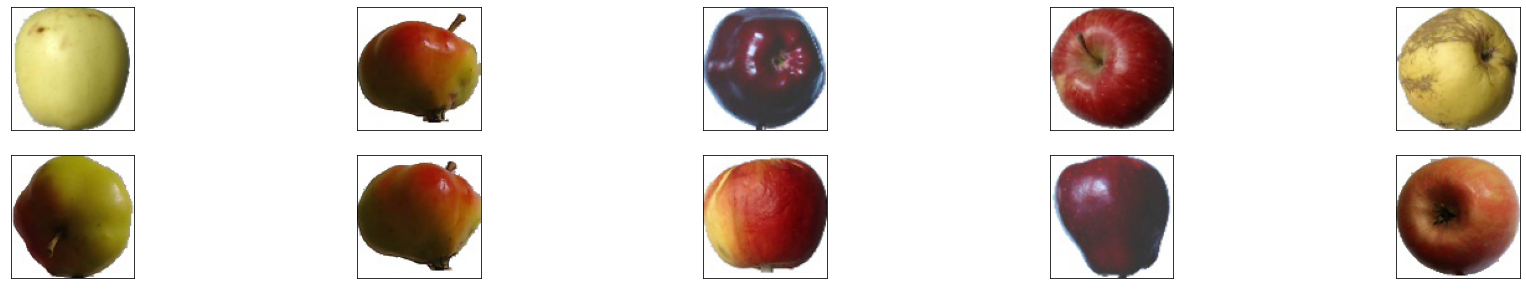

In [ ]:
# Visualizando as primeiras 10 imagens de treino

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
# Yummy fruits ;) 

**CNN - Cenário 1**

3 camadas convolucionais seguidas de Maxpooling, ativação RELU, camada densa com 100 neurônios, otimizador Rmsprop, 10 epocas.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 16)      208       
                                                                 
 activation_2 (Activation)   (None, 100, 100, 16)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 32)        2080      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 25, 25, 64)       

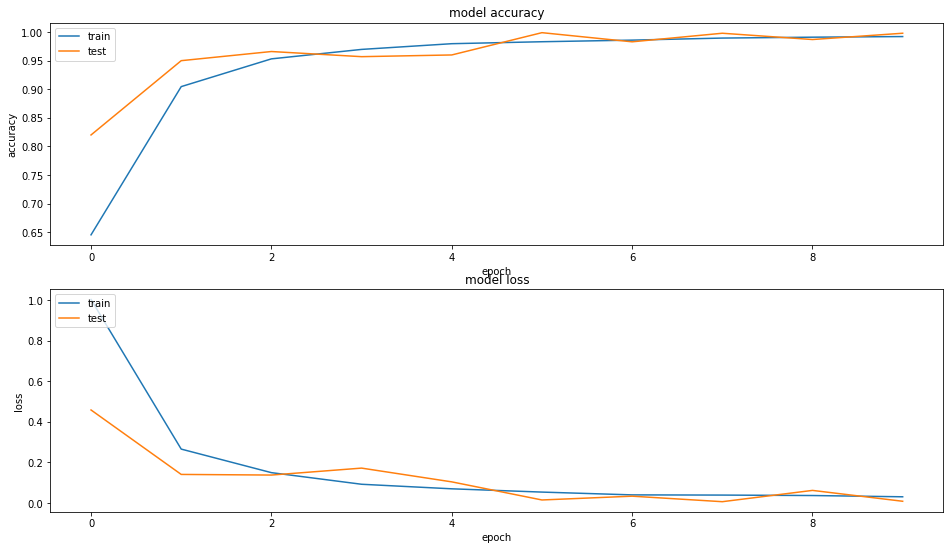

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(13,activation = 'softmax'))
model.summary()

# Compilando a CNN
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

# Executando o treinamento da CNN considerando o batch_size = 32
batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'cnn_grupo_15.hdf5', verbose = 1, save_best_only = True)

history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_vaild),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

# Carregando os pesos obtidos da CNN
model.load_weights('cnn_grupo_15.hdf5')

# Avaliando a acurácia
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


# Visualizando algumas predições das frutas

y_pred = model.predict(x_test)

fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    
print(history.history.keys())

# Visualizando a perda (loss) e a acurácia (accuracy) após o número de épocas escolhido

plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

**CNN - Cenário 2**


3 camadas convolucionais seguidas de Maxpooling, ativação RELU, camada densa com 100 neurônios, otimizador Rmsprop, 10 épocas.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 100, 100, 16)      208       
                                                                 
 activation_4 (Activation)   (None, 100, 100, 16)      0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 50, 50, 32)        2080      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 25, 25, 64)       

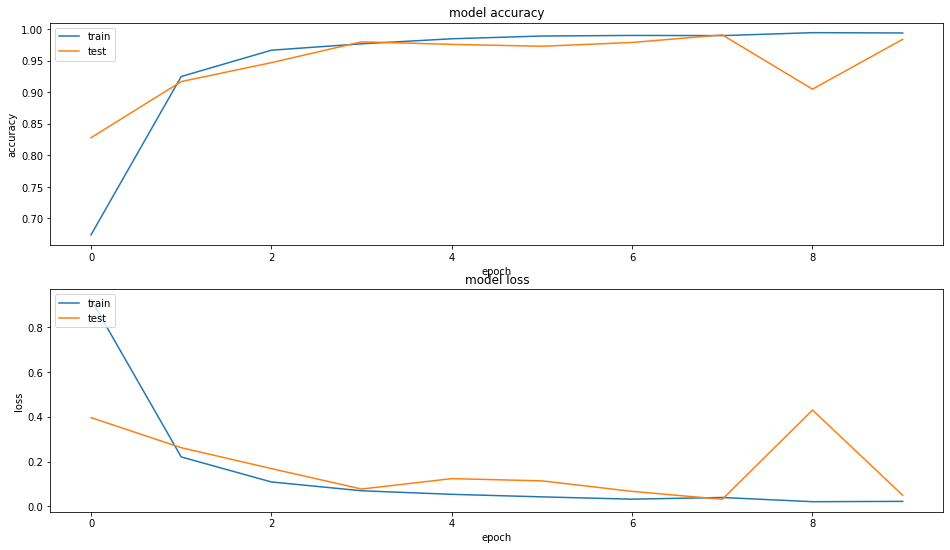

In [ ]:
model2 = Sequential()
model2.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=2))

model2.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model2.add(MaxPooling2D(pool_size=2))

model2.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model2.add(MaxPooling2D(pool_size=2))

model2.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model2.add(MaxPooling2D(pool_size=2))

model2.add(Dropout(0.3))
model2.add(Flatten())
model2.add(Dense(150))
model2.add(Activation('relu'))
model2.add(Dropout(0.4))
model2.add(Dense(13,activation = 'softmax'))
model2.summary()

# Compilando a CNN
model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

# Executando o treinamento da CNN considerando o batch_size = 32
batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'cnn_grupo_15.hdf5', verbose = 1, save_best_only = True)

history = model2.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_vaild),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

# Carregando os pesos obtidos da CNN
model2.load_weights('cnn_grupo_15.hdf5')

# Avaliando a acurácia
score = model2.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


# Visualizando algumas predições das frutas

y_pred = model2.predict(x_test)

fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    
print(history.history.keys())

# Visualizando a perda (loss) e a acurácia (accuracy) após o número de épocas escolhido

plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

**CNN - Cenário 3**

3 camadas convolucionais seguidas de Maxpooling, dropout 0.3, ativação RELU, camada densa com 150 neurônios, otimizador Adam, 10 épocas.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 100, 100, 16)      208       
                                                                 
 activation_6 (Activation)   (None, 100, 100, 16)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 50, 50, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 50, 50, 32)        2080      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 25, 25, 64)       

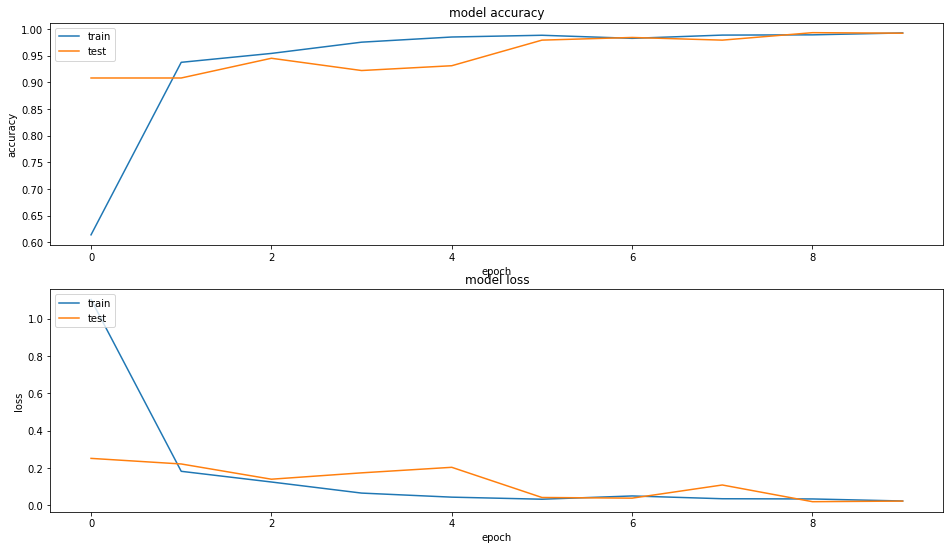

In [ ]:
model3 = Sequential()
model3.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=2))

model3.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model3.add(MaxPooling2D(pool_size=2))

model3.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model3.add(MaxPooling2D(pool_size=2))

# adicionado
model3.add(Dropout(0.3))

model3.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model3.add(MaxPooling2D(pool_size=2))

model3.add(Dropout(0.3))
model3.add(Flatten())
model3.add(Dense(150))
model3.add(Activation('relu'))
model3.add(Dropout(0.4))
model3.add(Dense(13,activation = 'softmax'))
model3.summary()

# Compilando a CNN
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Compiled!')

# Executando o treinamento da CNN considerando o batch_size = 32
batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'cnn_grupo_15.hdf5', verbose = 1, save_best_only = True)

history = model3.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_vaild),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

# Carregando os pesos obtidos da CNN
model3.load_weights('cnn_grupo_15.hdf5')

# Avaliando a acurácia
score = model3.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

# Visualizando algumas predições das frutas
y_pred = model3.predict(x_test)

fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    
print(history.history.keys())

# Visualizando a perda (loss) e a acurácia (accuracy) após o número de épocas escolhido

plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

**CNN - Cenário 4**

3 camadas convolucionais, 20 epocas, sem dropouts, otimizador adam.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 100, 100, 16)      208       
                                                                 
 activation_8 (Activation)   (None, 100, 100, 16)      0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 50, 50, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 50, 50, 32)        2080      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 25, 25, 64)       

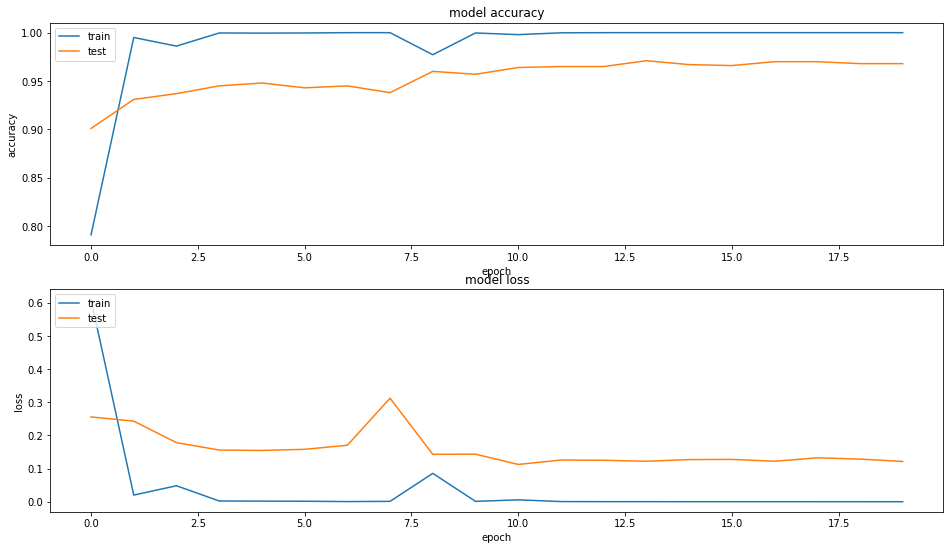

In [ ]:
model4 = Sequential()
model4.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=2))

model4.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model4.add(MaxPooling2D(pool_size=2))

model4.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model4.add(MaxPooling2D(pool_size=2))

model4.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model4.add(MaxPooling2D(pool_size=2))

model4.add(Flatten())
model4.add(Dense(300))
model4.add(Activation('relu'))
model4.add(Dense(13,activation = 'softmax'))
model4.summary()

# Compilando a CNN
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Compiled!')

# Executando o treinamento da CNN considerando o batch_size = 32
batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'cnn_grupo_15.hdf5', verbose = 1, save_best_only = True)

history = model4.fit(x_train,y_train,
        batch_size = 32,
        epochs=20,
        validation_data=(x_valid, y_vaild),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

# Carregando os pesos obtidos da CNN
model4.load_weights('cnn_grupo_15.hdf5')

# Avaliando a acurácia
score = model4.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

# Visualizando algumas predições das frutas
y_pred = model4.predict(x_test)

fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    
print(history.history.keys())

# Visualizando a perda (loss) e a acurácia (accuracy) após o número de épocas escolhido

plt.figure(1)  
   
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()


**K-Nearest Neighbors (KNN)** Multiclasses

In [ ]:
# Baixando dataset com apenas maçãs, porém limitados a 400 arquivos cada

!wget https://github.com/jeanluckei/deep-learning/raw/main/apples.zip
!unzip apples.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: apples/training/Apple Braeburn/r_152_100.jpg  
  inflating: apples/training/Apple Braeburn/r_153_100.jpg  
  inflating: apples/training/Apple Braeburn/r_154_100.jpg  
  inflating: apples/training/Apple Braeburn/r_155_100.jpg  
  inflating: apples/training/Apple Braeburn/r_156_100.jpg  
  inflating: apples/training/Apple Braeburn/r_157_100.jpg  
  inflating: apples/training/Apple Braeburn/r_158_100.jpg  
  inflating: apples/training/Apple Braeburn/r_159_100.jpg  
  inflating: apples/training/Apple Braeburn/r_15_100.jpg  
  inflating: apples/training/Apple Braeburn/r_160_100.jpg  
  inflating: apples/training/Apple Braeburn/r_161_100.jpg  
  inflating: apples/training/Apple Braeburn/r_162_100.jpg  
  inflating: apples/training/Apple Braeburn/r_163_100.jpg  
  inflating: apples/training/Apple Braeburn/r_164_100.jpg  
  inflating: apples/training/Apple Braeburn/r_165_100.jpg  
  inflating: apples/training/Apple Braebur

In [ ]:
##Processamento das imagens e resize
def read_resize(imagePath):
    image = cv2.imread(imagePath)
    return cv2.resize(image, (32, 32), interpolation=cv2.INTER_AREA)

def load(imagePaths):
  data = []
  labels = []
  for (i, imagePath) in enumerate(imagePaths):
    label = imagePath.split(os.path.sep)[-2]
    image = read_resize(imagePath)
    data.append(image)
    labels.append(label)
  return (np.array(data), np.array(labels))

In [ ]:
print("Carregando as imagens...")
imagePaths = list(paths.list_images('apples/training'))
(data, labels) = load(imagePaths)
data = data.reshape((data.shape[0], 3072))
print("Tamanho total: {:.1f}MB".format(data.nbytes / (1024 * 1024.0)))

Carregando as imagens...
Tamanho total: 15.2MB


In [ ]:
# Transformar os labels (nomes das pastas) em Integer
le = LabelEncoder()
labelsEncoded = le.fit_transform(labels)

# Separando os dados de treino e teste em 80% x 20%
# Random state 42 pois é a resposta para todas as perguntas
(trainX, testX, trainY, testY) = train_test_split(data, labelsEncoded,	test_size=0.2, random_state=42)

In [ ]:
print("Gerando gráfico de acurácia x K neighbors")
lix = []
liy = []
index=0
acc=0
for k in range(1, 50):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(trainX, trainY)
    liy.append(neigh.score(testX, testY)*100)
    if liy[k-1]>=acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)

Gerando gráfico de acurácia x K neighbors


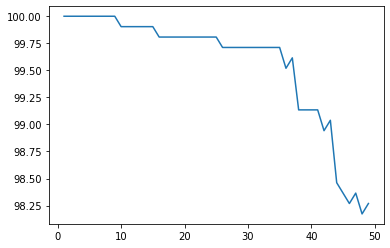

Acurácia máxima atingida em k=5 com valor de 100.0%


In [ ]:
plt.plot(lix, liy)
plt.show()
print("Acurácia máxima atingida em k=5 com valor de "+str(acc)+"%")

##KNN Cenário 1
K = 5

In [ ]:
model = KNeighborsClassifier(n_neighbors=5,	n_jobs=-1)
model.fit(trainX, trainY)
print("Resultado para 5 neighbours: \n"+classification_report(testY, model.predict(testX), target_names=le.classes_))

Resultado para 5 neighbours: 
                     precision    recall  f1-score   support

     Apple Braeburn       1.00      1.00      1.00        79
 Apple Crimson Snow       1.00      1.00      1.00        65
     Apple Golden 1       1.00      1.00      1.00        74
     Apple Golden 2       1.00      1.00      1.00        75
     Apple Golden 3       1.00      1.00      1.00        81
 Apple Granny Smith       1.00      1.00      1.00        90
    Apple Pink Lady       1.00      1.00      1.00        83
        Apple Red 1       1.00      1.00      1.00        81
        Apple Red 2       1.00      1.00      1.00        83
        Apple Red 3       1.00      1.00      1.00        78
Apple Red Delicious       1.00      1.00      1.00        77
 Apple Red Yellow 1       1.00      1.00      1.00        91
 Apple Red Yellow 2       1.00      1.00      1.00        83

           accuracy                           1.00      1040
          macro avg       1.00      1.00      1.00   

##KNN Cenário 2
K = 21

In [ ]:
model = KNeighborsClassifier(n_neighbors=21,	n_jobs=-1)
model.fit(trainX, trainY)
print("Resultado para 21 neighbours: \n"+classification_report(testY, model.predict(testX), target_names=le.classes_))

Resultado para 21 neighbours: 
                     precision    recall  f1-score   support

     Apple Braeburn       1.00      1.00      1.00        79
 Apple Crimson Snow       1.00      1.00      1.00        65
     Apple Golden 1       0.99      1.00      0.99        74
     Apple Golden 2       1.00      0.99      0.99        75
     Apple Golden 3       1.00      1.00      1.00        81
 Apple Granny Smith       1.00      1.00      1.00        90
    Apple Pink Lady       0.99      1.00      0.99        83
        Apple Red 1       1.00      1.00      1.00        81
        Apple Red 2       1.00      1.00      1.00        83
        Apple Red 3       1.00      1.00      1.00        78
Apple Red Delicious       1.00      1.00      1.00        77
 Apple Red Yellow 1       1.00      1.00      1.00        91
 Apple Red Yellow 2       1.00      0.99      0.99        83

           accuracy                           1.00      1040
          macro avg       1.00      1.00      1.00  

##KNN Cenário 3
K = 42

In [ ]:
print("Como encontrado acima, 5 vizinhos é o maior valor sem perder acurácia, \n"+
"sendo encontrado 100%, o que classifica overfiting, portanto utilizaremos o \n"+
"valor 42 que possui acurácia de 98.9%\n\n")
model = KNeighborsClassifier(n_neighbors=42,	n_jobs=-1)
model.fit(trainX, trainY)
print(classification_report(testY, model.predict(testX), target_names=le.classes_))

Como encontrado acima, 5 vizinhos é o maior valor sem perder acurácia, 
sendo encontrado 100%, o que classifica overfiting, portanto utilizaremos o 
valor 42 que possui acurácia de 98.9%


                     precision    recall  f1-score   support

     Apple Braeburn       1.00      1.00      1.00        79
 Apple Crimson Snow       0.97      1.00      0.98        65
     Apple Golden 1       0.94      1.00      0.97        74
     Apple Golden 2       1.00      0.93      0.97        75
     Apple Golden 3       1.00      1.00      1.00        81
 Apple Granny Smith       1.00      1.00      1.00        90
    Apple Pink Lady       0.99      0.98      0.98        83
        Apple Red 1       1.00      1.00      1.00        81
        Apple Red 2       0.97      1.00      0.98        83
        Apple Red 3       1.00      0.96      0.98        78
Apple Red Delicious       1.00      1.00      1.00        77
 Apple Red Yellow 1       1.00      1.00      1.00        91
 Apple Red Yellow

In [ ]:
print("Predizendo imagem teste:\n")

labels = sorted(list(dict.fromkeys(labels)))

# Descomente apenas uma imagePath abaixo para realizar o teste
# imagePath = "apples/test/Apple Red Delicious/0_100.jpg"
# imagePath = "apples/test/Apple Crimson Snow/83_100.jpg"
imagePath = "apples/test/Apple Golden 1/73_100.jpg"
# imagePath = "apples/test/Apple Golden 2/4_100.jpg"
#imagePath = "apples/test/Apple Golden 3/6_100.jpg"
# imagePath = "apples/test/Apple Red 3/4_100.jpg"

data = np.array([read_resize(imagePath)])
data = data.reshape((data.shape[0], 3072))

test_pred = model.predict(data)
print(labels[int(test_pred)])

Predizendo imagem teste:

Apple Golden 1



##Avaliação dos Resultados

Avaliação da rede CNN

Para avaliar a eficácia da rede neural em classificar as imagens, usamos uma métrica quantitativa, conhecida como acurácia. Basicamente, a acurácia indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente.

Os valores de acurácia foram calculados considerando cada cenário de hiperpâmetros utilizados no modelo. Na tabela abaixo, podemos ver que a maior acurácia foi obtida com a combinação de hiperparâmetros apresentados no cenário 1. Em contrapartida, o cenário 4 apresentou o menor valor, todavia, acima de 95% de acurácia.

|Cenários|Acurácia
|-------|:------|
|1|   0.9947090148925781   |
|2|   0.9894179701805115   |
|3|   0.9911816716194153   |
|4|   0.9576719403266907   |

Avaliação de resultados do método KNN:

|Cenários|Acurácia
|-------|:------|
|1|   1.0000000000000000   |
|2|   0.9985576923076923   |
|3|   0.9930288461538461   |
  

##Conclusões

Neste trabalho, apresentamos a implementação de dois algoritmos para classificação de imagens. 

De acordo com nossas análises de desempenho e com base no dataset escolhido, o algoritmo KNN mostrou-se um pouco mais eficiente do que o algoritmo CNN no processo de classificação. Entretanto, a margem foi muito pequena.  

Em relação ao tempo de execução, o algoritmo CNN converge para solução em 51s a cada época executada, já o algoritmo KNN converge em 44s para 42 cenários, sendo assim o KNN se mostrou mais eficiente, porém possui suas limitações quanto à identificação de imagens muito diferentes das contidas no dataset de treino. 

Dessa forma, concluímos que ambos os algoritmos, desde que bem configurados, podem ser excelentes alternativas para um processo de classificação que apresente as mesmas características do dataset trabalhado nessa análise.